# Signaling pathways

We will analyse simple signaling pathways and perform typical analysis with the model.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Introduction to ODE modeling

For more examples see the [online Tellurium documentation](http://tellurium.readthedocs.io/en/latest).

## Modeling in a nutshell
**Basic steps**: 
- write down the players (**species Si**) in your system
- write down the **processes vi** which influence your species and the **stoichiometry** (number of species consumed/produced via the process)
- write down mathematical equations for the **processes**
- equations define the **rates** of the processes, defining how fast the process changes the species

** Process **
$$v1: S1 \rightarrow S2$$

$$v1 = k1 \cdot S1$$

**System of ordinary differential equations (ODEs)**

The result is a list of mathematical equations (differential equations)
* can be solved with numerical methods
* results in time courses, i.e., the time-dependent 

$$\frac{dS1}{dt} = -v1 = -k1 \cdot S1$$  
$$\frac{dS2}{dt} = v1 = k1 \cdot S1$$

**Different basic patterns for these kinetic equations exist**
* Mass-Action kinetics
* Michaelis-Menten Kinetics (irreversible & reversible)
* Hill equations (cooperativity)
* Competitive Inhibition

### Mass-Action kinetics (irreversible)
Multiplication of the species in the process (weighted by stoichiometric coefficient) 
in combination with a single parameter

$$v1: c_1 \cdot S1 + c_2 \cdot S2 \rightarrow c_3 \cdot S3 + c_4 \cdot S4$$

$$v1 = k1 \cdot S1^{c_1} \cdot S2^{c_2}$$

concrete example

$$v1: S1 + 2 \cdot S2 \rightarrow S3$$

$$v1 = k1 \cdot S1 \cdot S2^2$$


### Mass-Action kinetics (reversible)
In the reversible Mass-Action kinetics also the backwards reaction (reversible) contributes. 
I.e. the process can als run in the opposite direction

$$v2: c_1 \cdot S1 + c_2 \cdot S2 \leftrightarrow c_3 \cdot S3 + c_4 \cdot S4$$

$$v2 = k1 \cdot S1^{c_1} \cdot S2^{c_2} - k2 \cdot S3^{c_3} \cdot S4^{c_4}$$


## 1. Phosphorylation cycle
One of the most important signaling motives are protein phosphorylation cycles, i.e., a post-translational modification of a protein in which an amino acid residue is phosphorylated by a protein kinase, and dephosphorylated by a protein phosphatase.

TODO: Figure

TODO: equations

In [2]:
### 1.1 build the model

In [19]:
import tellurium as te
import pandas as pd

// Created by libAntimony v2.11.0
model *pcycle()

  // Compartments and Species:
  species R, Rp;

  // Reactions:
  v1: R -> Rp; k1*S*R;
  v2: Rp -> R; k2*Rp;

  // Species initializations:
  R = 10;
  Rp = 0;

  // Variable initializations:
  k1 = 0.1;
  S = 1;
  k2 = 0.1;

  // Other declarations:
  const k1, S, k2;
end



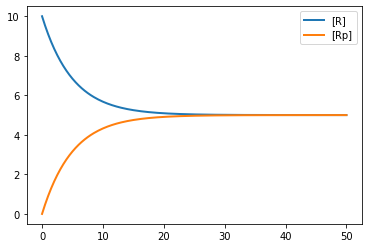

In [27]:
k1 = 0.1; k2 = 0.1;
R = 10.0; Rp = 0.0;
S = 1.0;

model_pcycle = te.loada(f"""
model pcycle()
  // compartments and species
  species R, Rp;

  // reactions
  v1: R -> Rp; k1*S*R;
  v2: Rp -> R; k2*Rp;
  
  k1 = {k1}; k2 = {k2};
  R = {R}; Rp = {Rp};
  S = {S};
end
""")

print(te.sbmlToAntimony(model_pcycle.getSBML()))

model_pcycle.simulate(start=0, end=50, steps=200)
model_pcycle.plot()

# Check mass balance
- add assignment rule, plot the additional speices

// Created by libAntimony v2.11.0
model *pcycle()

  // Compartments and Species:
  species R, Rp;

  // Assignment Rules:
  Rt := R + Rp;

  // Reactions:
  v1: R -> Rp; k1*S*R;
  v2: Rp -> R; k2*Rp;

  // Species initializations:
  R = 10;
  Rp = 0;

  // Variable initializations:
  k1 = 0.1;
  S = 1;
  k2 = 0.1;

  // Other declarations:
  var Rt;
  const k1, S, k2;
end



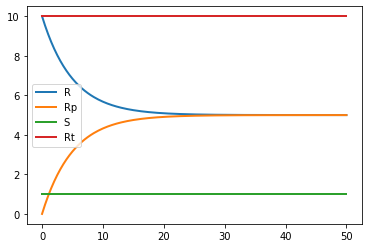

      time          R        Rp    S    Rt
0     0.00  10.000000  0.000000  1.0  10.0
1     0.25   9.756147  0.243853  1.0  10.0
2     0.50   9.524188  0.475812  1.0  10.0
3     0.75   9.303541  0.696459  1.0  10.0
4     1.00   9.093654  0.906346  1.0  10.0
..     ...        ...       ...  ...   ...
196  49.00   5.000279  4.999721  1.0  10.0
197  49.25   5.000265  4.999735  1.0  10.0
198  49.50   5.000252  4.999748  1.0  10.0
199  49.75   5.000240  4.999760  1.0  10.0
200  50.00   5.000228  4.999772  1.0  10.0

[201 rows x 5 columns]


In [28]:
k1 = 0.1; k2 = 0.1;
R = 10.0; Rp = 0.0;
S = 1.0;

model_pcycle = te.loada(f"""
model pcycle()
  v1: R -> Rp; k1*S*R;
  v2: Rp -> R; k2*Rp;
  k1 = {k1}; k2 = {k2};
  R = {R}; Rp = {Rp};
  S = {S};
  
  // rules
  Rt := R + Rp
end
""")  # type: RoadRunner

print(te.sbmlToAntimony(model_pcycle.getSBML()))

selections = ["time", "R", "Rp", "S", "Rt"]

s = model_pcycle.simulate(start=0, end=50, steps=200, selections=selections)
s = pd.DataFrame(s, columns=s.colnames)
model_pcycle.plot()
print(s)

In [ ]:
# Timecourse parameter scan
# TODO:




# TODO: equation

### 1.2 steady state (steady state parameter scan)

- compare numerical simulation against analytical solution vs actual steady state simulation

In [ ]:
### 1.3 sensitivity of steady state

TODO:
- compare numerical simulations against analytical solution
1.3.1 Dependency on signal
1.3.2. Dependency on total response regulator

## 2. Two-component system

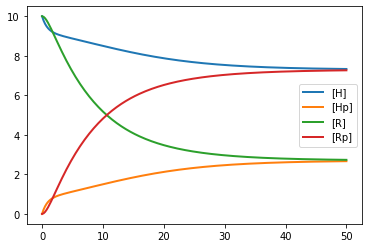

In [31]:
model_twocomp = te.loada(f"""
model pcycle()
  v1: H -> Hp; k1*S*H;
  v2: Hp + R -> H + Rp; k2*R*Hp;
  v3: Rp -> R; k3 * Rp;
  
  // initial values
  H = 10.0; Hp = 0.0;
  R = 10.0; Rp = 0.0;
  
  // parameters
  S = 1.0;
  k1 = 0.1; k2 = 0.1; k3 = 0.1;
  
  // rules
  Ht := H + Hp
  Rt := R + Rp
end
""")
model_twocomp.simulate(start=0, end=50, steps=200)
model_twocomp.plot()

**Perfect adaption** 
- integral feedback
- TODO: equation & test the system;

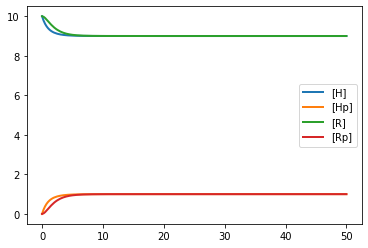

AttributeError: 'NoneType' object has no attribute 'AGraph'

In [35]:
model_tcperfect = te.loada(f"""
model pcycle()
  v1: H -> Hp; k1*S*H;
  v2: Hp + R -> H + Rp; k2*R*Hp;
  v3: Rp -> R; k3 * Rp * H;
  
  // initial values
  H = 10.0; Hp = 0.0;
  R = 10.0; Rp = 0.0;
  
  // parameters
  S = 1.0;
  k1 = 0.1; k2 = 0.1; k3 = 0.1;
  
  // rules
  Ht := H + Hp
  Rt := R + Rp
end
""")

model_tcperfect.simulate(start=0, end=50, steps=200)
model_tcperfect.plot()

Compare steady state solution for response regulator
- numerical solution

# MAPK
## Kholodenko2000 - Ultrasensitivity and negative feedback bring oscillations in MAPK cascade

This model is described in the article:  
**Negative feedback and ultrasensitivity can bring about oscillations in the mitogen-activated protein kinase cascades.**  
Kholodenko BN  
Eur. J. Biochem. 2000; 267(6):1583-8  
http://identifiers.org/pubmed/10712587  

Abstract:

Functional organization of signal transduction into protein phosphorylation cascades, such as the mitogen-activated protein kinase (MAPK) cascades, greatly enhances the sensitivity of cellular targets to external stimuli. The sensitivity increases multiplicatively with the number of cascade levels, so that a tiny change in a stimulus results in a large change in the response, the phenomenon referred to as ultrasensitivity. In a variety of cell types, the MAPK cascades are imbedded in long feedback loops, positive or negative, depending on whether the terminal kinase stimulates or inhibits the activation of the initial level. Here we demonstrate that a negative feedback loop combined with intrinsic ultrasensitivity of the MAPK cascade can bring about sustained oscillations in MAPK phosphorylation. Based on recent kinetic data on the MAPK cascades, we predict that the period of oscillations can range from minutes to hours. The phosphorylation level can vary between the base level and almost 100% of the total protein. The oscillations of the phosphorylation cascades and slow protein diffusion in the cytoplasm can lead to intracellular waves of phospho-proteins.

https://www.ebi.ac.uk/biomodels-main/BIOMD0000000010


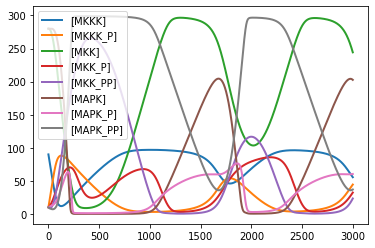

In [14]:
import tellurium as te

# Load model from biomodels (may not work with https).
r = te.loadSBMLModel("https://www.ebi.ac.uk/biomodels-main/download?mid=BIOMD0000000010")
result = r.simulate(start=0, end=3000, steps=3000)
r.plot(result)

In [15]:
print(te.sbmlToAntimony(r.getSBML()))

// Created by libAntimony v2.11.0
model *BIOMD0000000010()

  // Compartments and Species:
  compartment uVol;
  species MKKK in uVol, MKKK_P in uVol, MKK in uVol, MKK_P in uVol, MKK_PP in uVol;
  species MAPK in uVol, MAPK_P in uVol, MAPK_PP in uVol;

  // Reactions:
  J0: MKKK => MKKK_P; uVol*J0_V1*MKKK/((1 + (MAPK_PP/J0_Ki)^J0_n)*(J0_K1 + MKKK));
  J1: MKKK_P => MKKK; uVol*J1_V2*MKKK_P/(J1_KK2 + MKKK_P);
  J2: MKK => MKK_P; uVol*J2_k3*MKKK_P*MKK/(J2_KK3 + MKK);
  J3: MKK_P => MKK_PP; uVol*J3_k4*MKKK_P*MKK_P/(J3_KK4 + MKK_P);
  J4: MKK_PP => MKK_P; uVol*J4_V5*MKK_PP/(J4_KK5 + MKK_PP);
  J5: MKK_P => MKK; uVol*J5_V6*MKK_P/(J5_KK6 + MKK_P);
  J6: MAPK => MAPK_P; uVol*J6_k7*MKK_PP*MAPK/(J6_KK7 + MAPK);
  J7: MAPK_P => MAPK_PP; uVol*J7_k8*MKK_PP*MAPK_P/(J7_KK8 + MAPK_P);
  J8: MAPK_PP => MAPK_P; uVol*J8_V9*MAPK_PP/(J8_KK9 + MAPK_PP);
  J9: MAPK_P => MAPK; uVol*J9_V10*MAPK_P/(J9_KK10 + MAPK_P);

  // Species initializations:
  MKKK = 90;
  MKKK_P = 10;
  MKK = 280;
  MKK_P = 10;
  MKK_PP 